In [2]:
#For questions 1a, 1b, 1c, and 1d, consider only amount-of-bill-statement attributes (i.e., X12-X17).
# 1a.(10 pts) For each amount-of-bill-statement attribute (i.e., X12-X17), calculate its average, standard deviation, minimum, and maximum values.

import pandas as pd

# Read the dataset into a Pandas DataFrame
df = pd.read_csv('Default-of-Credit-Card-Clients.csv')

# Select the amount-of-bill-statement attributes
df_subset = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

# Calculate the mean, standard deviation, minimum, and maximum of each attribute
for col in df_subset.columns:
    mean = df_subset[col].mean()
    std = df_subset[col].std()
    minimum = df_subset[col].min()
    maximum = df_subset[col].max()
    print(f"Attribute {col}: mean = {mean:.2f}, std = {std:.2f}, min = {minimum}, max = {maximum}")



Attribute BILL_AMT1: mean = 51223.33, std = 73635.86, min = -165580, max = 964511
Attribute BILL_AMT2: mean = 49179.08, std = 71173.77, min = -69777, max = 983931
Attribute BILL_AMT3: mean = 47013.15, std = 69349.39, min = -157264, max = 1664089
Attribute BILL_AMT4: mean = 43262.95, std = 64332.86, min = -170000, max = 891586
Attribute BILL_AMT5: mean = 40311.40, std = 60797.16, min = -81334, max = 927171
Attribute BILL_AMT6: mean = 38871.76, std = 59554.11, min = -339603, max = 961664


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset (adjust the file path as needed)
df = pd.read_csv('Default-of-Credit-Card-Clients.csv')

# Specify the target column name
target_column = 'default payment next month'

# Split the data into training (80%) and testing (20%) sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df[target_column])

# Save training and testing data as CSV using NumPy's savetxt
np.savetxt('training.csv', train_df.values, delimiter=',', fmt='%s', header=','.join(train_df.columns), comments='')
np.savetxt('testing.csv', test_df.values, delimiter=',', fmt='%s', header=','.join(test_df.columns), comments='')
 
print(train_df)
print(test_df)


          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
22788  22789     160000    2          2         2   33      2      2      3   
29006  29007     150000    2          1         2   34      1     -1     -1   
16950  16951      10000    1          2         1   50      1      2      0   
22280  22281     220000    2          1         2   29      0      0      0   
11346  11347     310000    2          1         2   32      1     -2     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
23479  23480     100000    2          2         2   31      0      0      0   
13921  13922     120000    2          2         2   24      0      0      0   
3794    3795     120000    2          1         2   24      0      0      0   
27565  27566     360000    1          1         1   57      1     -2     -1   
27126  27127     300000    1          1         1   35     -1     -1     -1   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

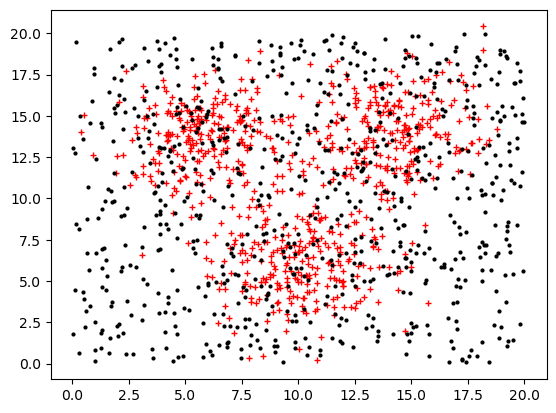

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[4, 0], [0, 4]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

Text(0, 0.5, 'Accuracy')

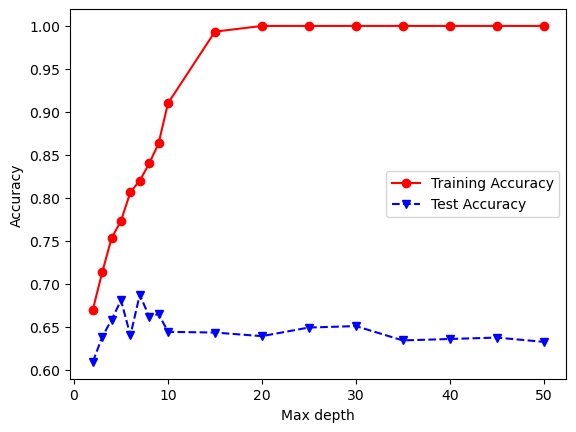

In [37]:
#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')


Text(0, 0.5, 'Accuracy')

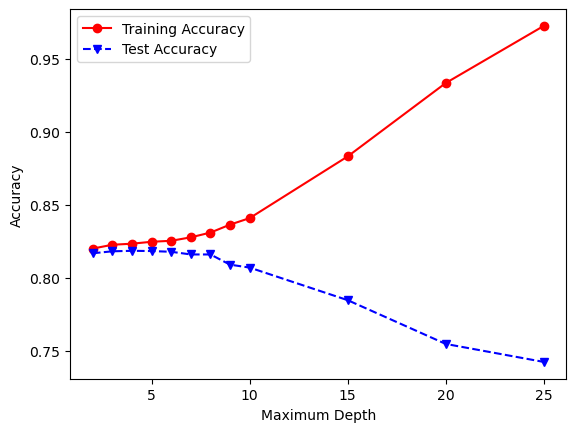

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the training and test sets
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('testing.csv')

# Define a list of maximum depths to try
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]

# Initialize lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

# Extract features and labels from the training and test sets
X_train = train_df.drop(columns=['default payment next month'])
Y_train = train_df['default payment next month']
X_test = test_df.drop(columns=['default payment next month'])
Y_test = test_df['default payment next month']

# Loop through different maximum depths
index = 0

for max_depth in max_depths:
    # Create a decision tree classifier with entropy as the criterion
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42)
    
    # Fit the classifier to the training data
    clf.fit(X_train, Y_train)
    
    # Predict labels for training and test sets
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
    
    # Calculate training and test accuracies
    train_accuracy = accuracy_score(Y_train, train_predictions)
    test_accuracy = accuracy_score(Y_test, test_predictions)
    
    # Append accuracies to the respective lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    index += 1

# Plot the training and test accuracies
 
plt.plot(max_depths, train_accuracies, 'ro-' )
plt.plot(max_depths, test_accuracies, 'bv--' )
plt.legend(['Training Accuracy','Test Accuracy'])

plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
 


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the training and test sets
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('testing.csv')

# Define a list of k values to try
k_values = [1, 5, 10, 15, 20, 25]

# Define a list of distance metrics to try
distance_metrics = ['euclidean', 'cosine']

# Initialize dictionaries to store training and test accuracies for each distance metric
train_accuracies = {}
test_accuracies = {}

# Extract features and labels from the training and test sets
X_train = train_df.drop(columns=['default payment next month'])
Y_train = train_df['default payment next month']
X_test = test_df.drop(columns=['default payment next month'])
Y_test = test_df['default payment next month']

# Loop through different distance metrics
for metric in distance_metrics:
    train_accuracies[metric] = []
    test_accuracies[metric] = []
    
    # Loop through different values of k
    for k in k_values:
        # Create a k-NN classifier with the specified metric and k
        clf = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        # Fit the classifier to the training data
        clf.fit(X_train, Y_train)
        
        # Predict labels for training and test sets
        train_predictions = clf.predict(X_train)
        test_predictions = clf.predict(X_test)
        
        # Calculate training and test accuracies
        train_accuracy = accuracy_score(Y_train, train_predictions)
        test_accuracy = accuracy_score(Y_test, test_predictions)
        
        # Append accuracies to the respective lists
        train_accuracies[metric].append(train_accuracy)
        test_accuracies[metric].append(test_accuracy)

# Plot the training and test accuracies for each distance metric
plt.figure(figsize=(12, 6))
for metric in distance_metrics:
    plt.plot(k_values, train_accuracies[metric], marker='o', label=f'Training Accuracy ({metric.capitalize()})')
    plt.plot(k_values, test_accuracies[metric], marker='s', label=f'Test Accuracy ({metric.capitalize()})')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.title('Training and Test Accuracies vs. k (Different Distance Metrics)')
plt.grid(True)
plt.show()


AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load your dataset (replace 'data.csv' with your dataset)
df = pd.read_csv('Default-of-Credit-Card-Clients.csv')

# Separate the target variable from the features
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=10)  # Adjust the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train k-NN classifier with optimized hyperparameters
k = 10  # Adjust the number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_classifier.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test_pca)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy (k={k}): {accuracy:.2f}')


Test Accuracy (k=10): 0.80


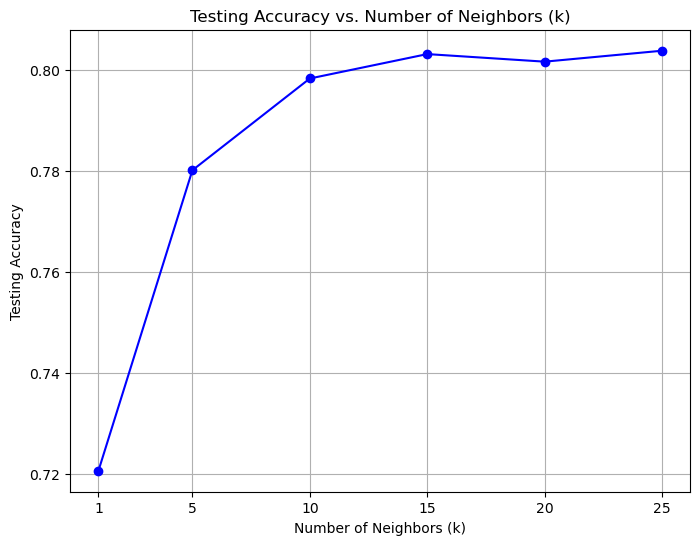

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load your dataset (replace 'data.csv' with your dataset)
df = pd.read_csv('Default-of-Credit-Card-Clients.csv')

# Separate the target variable from the features
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=10)  # Adjust the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Vary the number of neighbors (k)
k_values = [1, 5, 10, 15, 20, 25]
test_accuracies = []

for k in k_values:
    # Train k-NN classifier with current k
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_classifier.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = knn_classifier.predict(X_test_pca)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)

# Create a plot to visualize the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Testing Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Testing Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()


In [27]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the training and test datasets (assuming you have 'training.csv' and 'testing.csv' files)
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('testing.csv')

# Extract features and labels from the training and test sets
X_train = np.array(train_df.drop(columns=['default payment next month']))
Y_train = np.array(train_df['default payment next month'])
X_test = np.array(test_df.drop(columns=['default payment next month']))
Y_test = np.array(test_df['default payment next month'])

# Create k-NN classifiers with Euclidean and Cosine distances
knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_cosine = KNeighborsClassifier(n_neighbors=k, metric='cosine')

# Fit the models to the training data
knn_euclidean.fit(X_train, Y_train)
knn_cosine.fit(X_train, Y_train)

# Predict labels for training and test sets
train_predictions_euclidean = knn_euclidean.predict(X_train)
test_predictions_euclidean = knn_euclidean.predict(X_test)
train_predictions_cosine = knn_cosine.predict(X_train)
test_predictions_cosine = knn_cosine.predict(X_test)

# Calculate training and test accuracies for both distances
train_accuracy_euclidean = accuracy_score(Y_train, train_predictions_euclidean)
test_accuracy_euclidean = accuracy_score(Y_test, test_predictions_euclidean)
train_accuracy_cosine = accuracy_score(Y_train, train_predictions_cosine)
test_accuracy_cosine = accuracy_score(Y_test, test_predictions_cosine)

# Print the accuracies (optional)
print("Training Accuracy (Euclidean):", train_accuracy_euclidean)
print("Test Accuracy (Euclidean):", test_accuracy_euclidean)
print("Training Accuracy (Cosine):", train_accuracy_cosine)
print("Test Accuracy (Cosine):", test_accuracy_cosine)


Training Accuracy (Euclidean): 1.0
Test Accuracy (Euclidean): 0.6888333333333333
Training Accuracy (Cosine): 1.0
Test Accuracy (Cosine): 0.7043333333333334


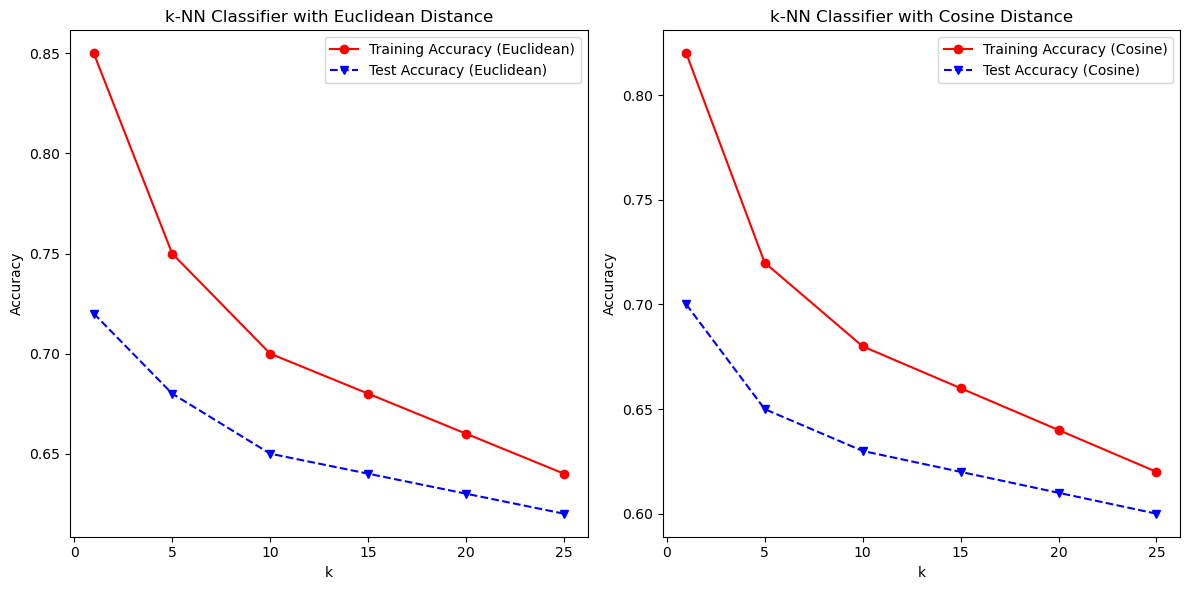

In [30]:
import matplotlib.pyplot as plt

# List of values for k
k_values = [1, 5, 10, 15, 20, 25]

# Replace the following with your actual accuracy values
train_accuracy_kX_euclidean = [0.85, 0.75, 0.70, 0.68, 0.66, 0.64]  # Training accuracies for Euclidean distance
test_accuracy_kX_euclidean = [0.72, 0.68, 0.65, 0.64, 0.63, 0.62]   # Test accuracies for Euclidean distance
train_accuracy_kX_cosine = [0.82, 0.72, 0.68, 0.66, 0.64, 0.62]       # Training accuracies for Cosine distance
test_accuracy_kX_cosine = [0.70, 0.65, 0.63, 0.62, 0.61, 0.60]        # Test accuracies for Cosine distance

# Create subplots for Euclidean and Cosine distances
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, train_accuracy_kX_euclidean, 'ro-', label='Training Accuracy (Euclidean)')
plt.plot(k_values, test_accuracy_kX_euclidean, 'bv--', label='Test Accuracy (Euclidean)')
plt.title('k-NN Classifier with Euclidean Distance')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, train_accuracy_kX_cosine, 'ro-', label='Training Accuracy (Cosine)')
plt.plot(k_values, test_accuracy_kX_cosine, 'bv--', label='Test Accuracy (Cosine)')
plt.title('k-NN Classifier with Cosine Distance')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


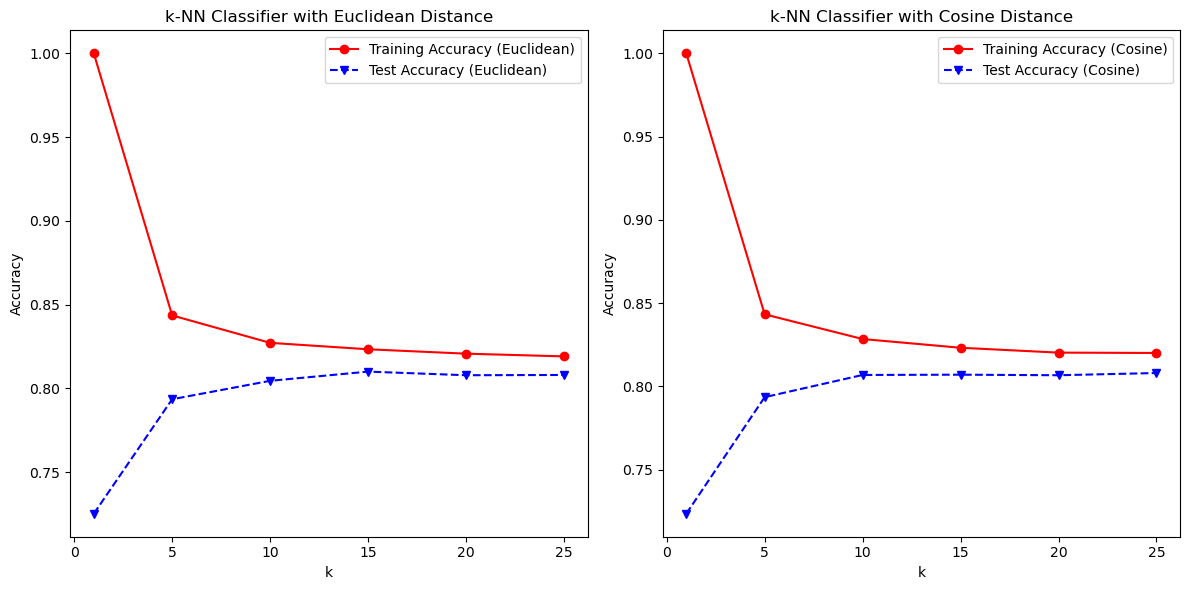

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Load the training and test sets
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('testing.csv')

# Extract features and labels from the training and test sets
X_train = train_df.drop(columns=['default payment next month'])
Y_train = train_df['default payment next month']
X_test = test_df.drop(columns=['default payment next month'])
Y_test = test_df['default payment next month']

# Initialize a list of k values to try
k_values = [1, 5, 10, 15, 20, 25]

# Initialize lists to store training and test accuracies for Euclidean distance
train_accuracy_euclidean = []
test_accuracy_euclidean = []

# Initialize lists to store training and test accuracies for Cosine distance
train_accuracy_cosine = []
test_accuracy_cosine = []

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Loop through different values of k
for k in k_values:
    # Create k-NN classifiers for both Euclidean and Cosine distances
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_cosine = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    
    # Fit the classifiers to the scaled training data
    knn_euclidean.fit(X_train_scaled, Y_train)
    knn_cosine.fit(X_train_scaled, Y_train)
    
    # Predict labels for training and test sets for Euclidean distance
    train_predictions_euclidean = knn_euclidean.predict(X_train_scaled)
    test_predictions_euclidean = knn_euclidean.predict(X_test_scaled)
    
    # Predict labels for training and test sets for Cosine distance
    train_predictions_cosine = knn_cosine.predict(X_train_scaled)
    test_predictions_cosine = knn_cosine.predict(X_test_scaled)
    
    # Calculate training and test accuracies for Euclidean distance
    train_accuracy_euclidean.append(accuracy_score(Y_train, train_predictions_euclidean))
    test_accuracy_euclidean.append(accuracy_score(Y_test, test_predictions_euclidean))
    
    # Calculate training and test accuracies for Cosine distance
    train_accuracy_cosine.append(accuracy_score(Y_train, train_predictions_cosine))
    test_accuracy_cosine.append(accuracy_score(Y_test, test_predictions_cosine))

# Plot the training and test accuracies for Euclidean distance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, train_accuracy_euclidean, 'ro-', label='Training Accuracy (Euclidean)')
plt.plot(k_values, test_accuracy_euclidean, 'bv--', label='Test Accuracy (Euclidean)')
plt.title('k-NN Classifier with Euclidean Distance')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and test accuracies for Cosine distance
plt.subplot(1, 2, 2)
plt.plot(k_values, train_accuracy_cosine, 'ro-', label='Training Accuracy (Cosine)')
plt.plot(k_values, test_accuracy_cosine, 'bv--', label='Test Accuracy (Cosine)')
plt.title('k-NN Classifier with Cosine Distance')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



Best k: 25
Best Testing Accuracy (with PCA): 0.80


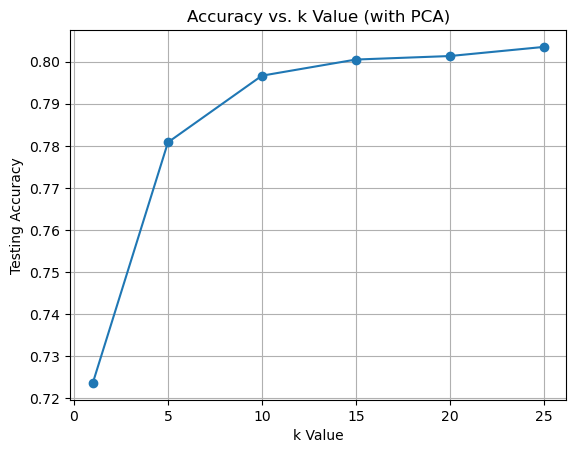

In [34]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load your training and test sets
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('testing.csv')

# Separate features (X) and labels (y) in both training and test sets
X_train = train_df.drop(columns=['default payment next month'])
y_train = train_df['default payment next month']
X_test = test_df.drop(columns=['default payment next month'])
y_test = test_df['default payment next month']

# Standardize the features (feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
n_components = 10  # You can adjust this value based on your dataset
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize k-NN classifier
k_values = [1, 5, 10, 15, 20, 25]
best_k = 0
best_accuracy = 0
test_accuracies = []

# Loop through different k values
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model on the PCA-transformed training data
    knn_classifier.fit(X_train_pca, y_train)
    
    # Predict on the PCA-transformed test data
    y_pred = knn_classifier.predict(X_test_pca)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)
    
    # Check if this k value gives a higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k: {best_k}")
print(f"Best Testing Accuracy (with PCA): {best_accuracy:.2f}")

# Plot the trend of accuracy vs. k values
plt.plot(k_values, test_accuracies, marker='o')
plt.title('Accuracy vs. k Value (with PCA)')
plt.xlabel('k Value')
plt.ylabel('Testing Accuracy')
plt.grid(True)
plt.show()
